In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

__Start with completed trips from Sourish's repo__

In [2]:
complete_trips = pd.read_csv('../Data/data_complete_trips.csv')

_Create a unique trip identifier_

In [3]:
complete_trips['trip_date'] = complete_trips['TRIP_ID'].astype('str') + complete_trips['CALENDAR_ID'].astype('str')

In [4]:
complete_trips.columns

Index(['Unnamed: 0', 'CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE',
       'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS', 'trip_date'],
      dtype='object')

How does the direction of travel and route affect Headway Deviation?

**Groupby Route direction and route and look at histogram of Headway deviation**

count    18209.000000
mean         0.654486
std          6.707284
min        -33.600000
25%         -2.883334
50%          0.200000
75%          3.316666
max         76.866666
Name: HDWY_DEV, dtype: float64


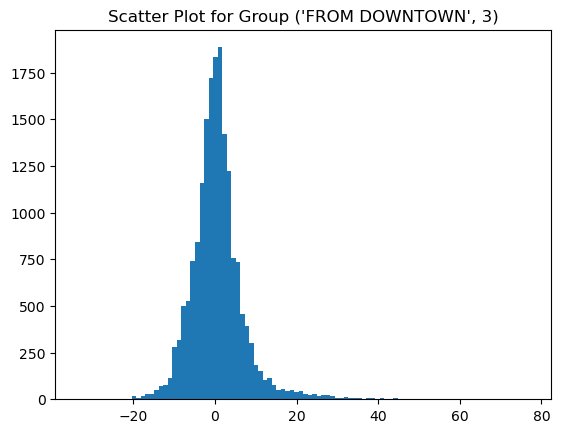

count    5873.000000
mean        0.373531
std         6.482244
min       -28.550000
25%        -2.450000
50%         0.083333
75%         2.616666
max        50.250000
Name: HDWY_DEV, dtype: float64


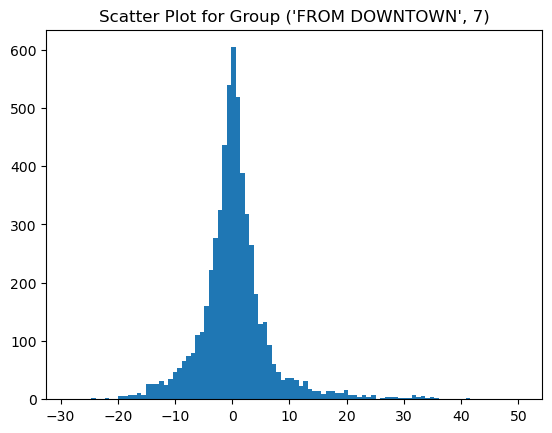

count    8936.000000
mean        1.081136
std        11.449493
min       -43.650000
25%        -2.150000
50%         0.083333
75%         2.533333
max       508.700000
Name: HDWY_DEV, dtype: float64


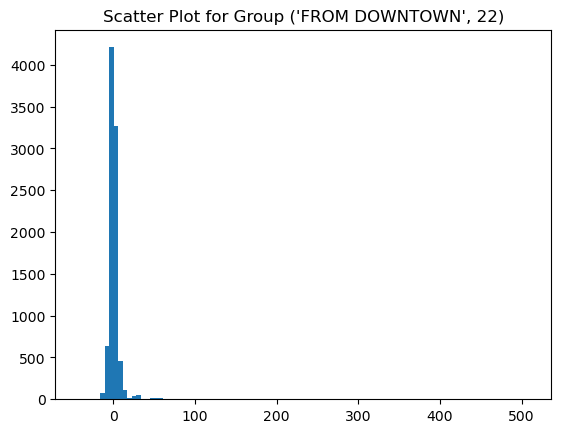

count    16747.000000
mean         1.067535
std         10.285292
min        -32.116667
25%         -1.850000
50%          0.066666
75%          2.116666
max        565.433333
Name: HDWY_DEV, dtype: float64


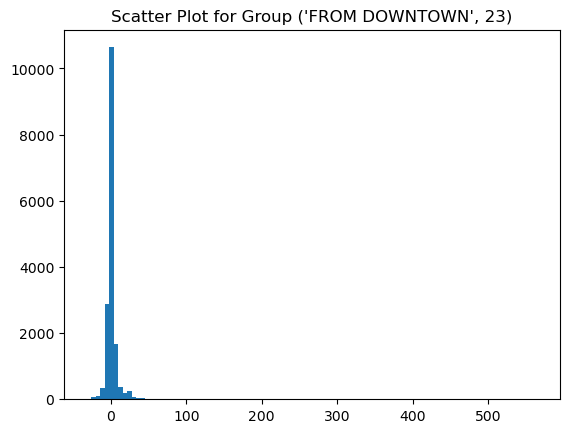

count    17234.000000
mean         0.223552
std          4.936874
min        -33.250000
25%         -2.166667
50%          0.033333
75%          2.300000
max         42.350000
Name: HDWY_DEV, dtype: float64


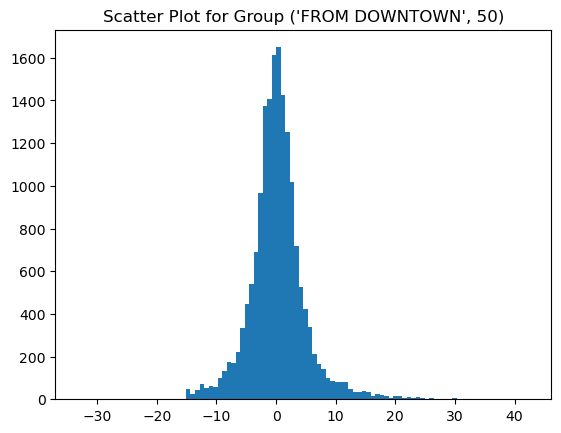

count    20565.000000
mean         1.223250
std          9.830540
min        -55.533334
25%         -2.933334
50%          0.083333
75%          3.466666
max        164.766666
Name: HDWY_DEV, dtype: float64


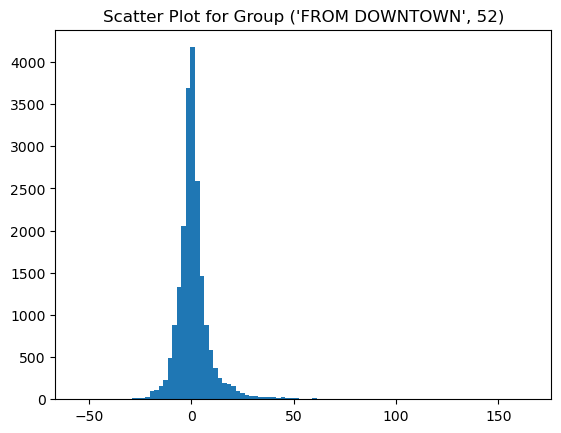

count    24420.000000
mean         0.254136
std          7.010325
min        -29.933334
25%         -3.783334
50%         -0.133334
75%          3.466666
max         61.916666
Name: HDWY_DEV, dtype: float64


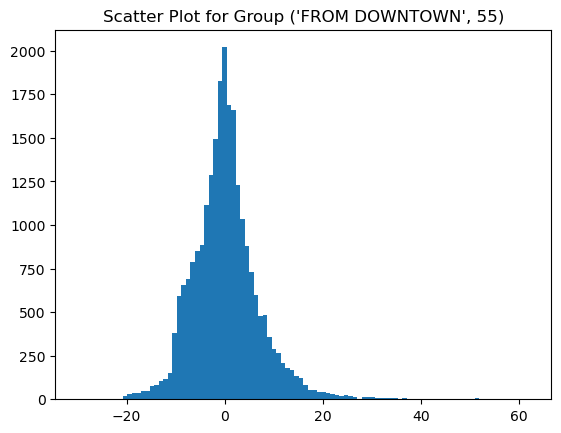

count    28829.000000
mean         0.141700
std          5.144761
min        -22.700000
25%         -2.750000
50%         -0.016667
75%          2.750000
max        166.000000
Name: HDWY_DEV, dtype: float64


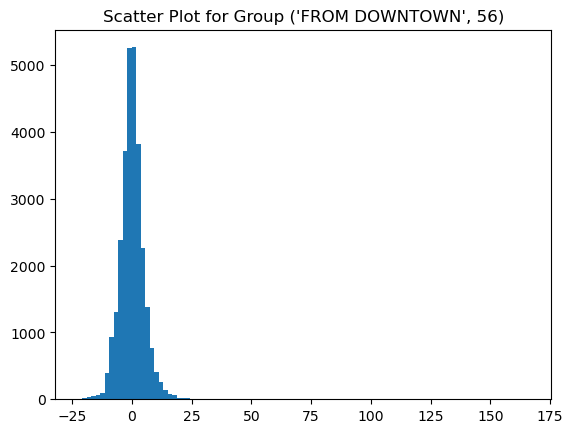

count    18268.000000
mean         0.522375
std          5.591803
min        -64.000000
25%         -2.083334
50%          0.066666
75%          2.333333
max         69.916666
Name: HDWY_DEV, dtype: float64


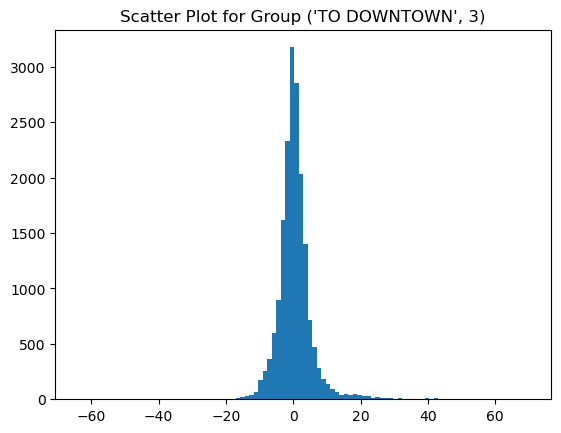

count    5693.000000
mean        0.293108
std         5.233017
min       -30.433334
25%        -1.650000
50%         0.000000
75%         1.750000
max        40.166666
Name: HDWY_DEV, dtype: float64


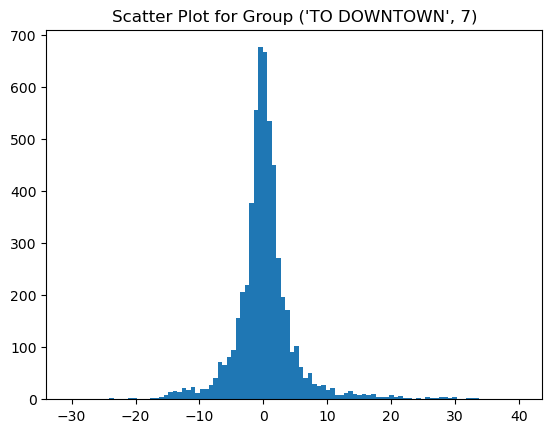

count    8056.000000
mean        0.812169
std         8.718989
min       -32.866667
25%        -1.733334
50%         0.016666
75%         1.883333
max       238.983333
Name: HDWY_DEV, dtype: float64


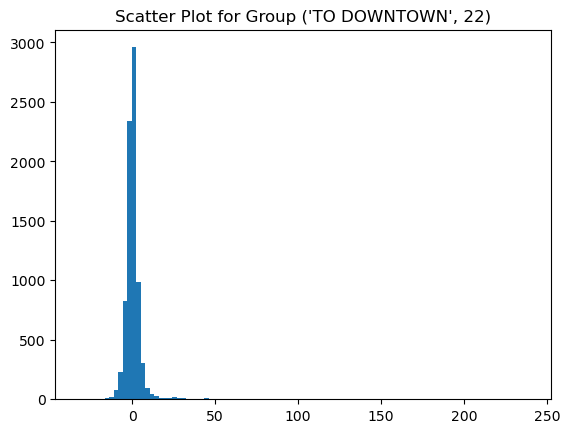

count    11690.000000
mean         1.038015
std          9.285092
min        -29.216667
25%         -1.566667
50%          0.066666
75%          2.000000
max        543.833333
Name: HDWY_DEV, dtype: float64


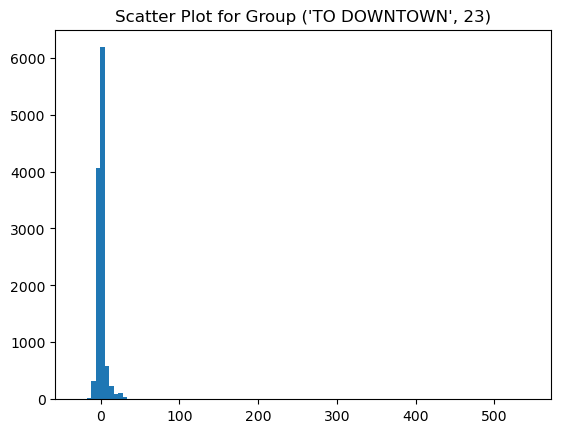

count    17274.000000
mean         0.200898
std          4.566663
min        -26.833334
25%         -1.983334
50%          0.033333
75%          2.050000
max         54.283333
Name: HDWY_DEV, dtype: float64


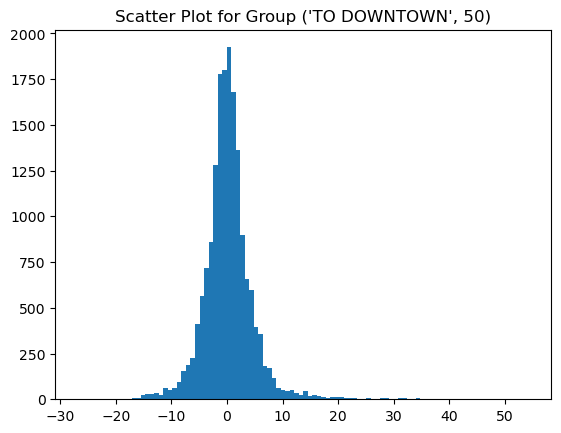

count    19169.000000
mean         0.695345
std          8.157984
min        -42.683334
25%         -2.016667
50%          0.083333
75%          2.233333
max        472.366666
Name: HDWY_DEV, dtype: float64


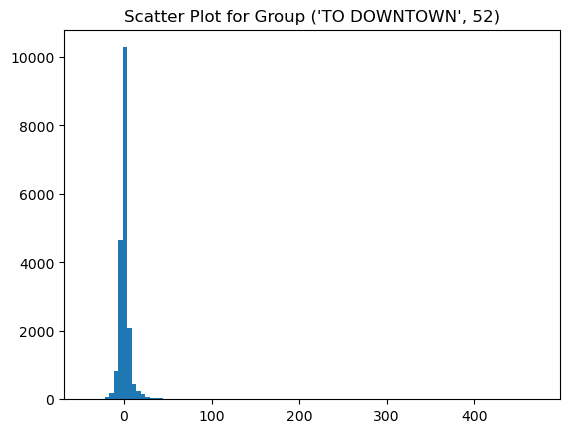

count    24830.000000
mean         0.266070
std          5.620222
min        -23.350000
25%         -2.600000
50%          0.033333
75%          2.633333
max        102.000000
Name: HDWY_DEV, dtype: float64


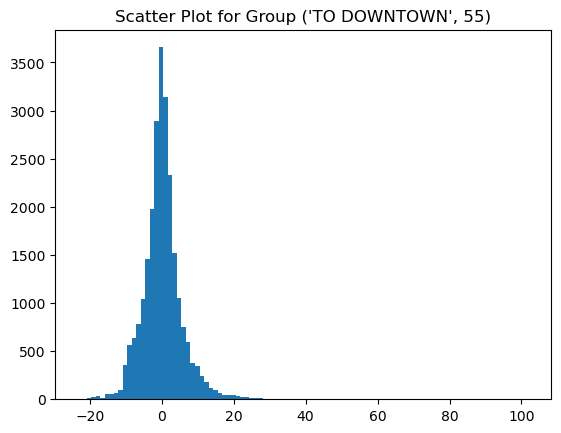

count    19305.000000
mean         0.134509
std          3.948412
min        -27.266667
25%         -1.850000
50%          0.016666
75%          1.900000
max         35.700000
Name: HDWY_DEV, dtype: float64


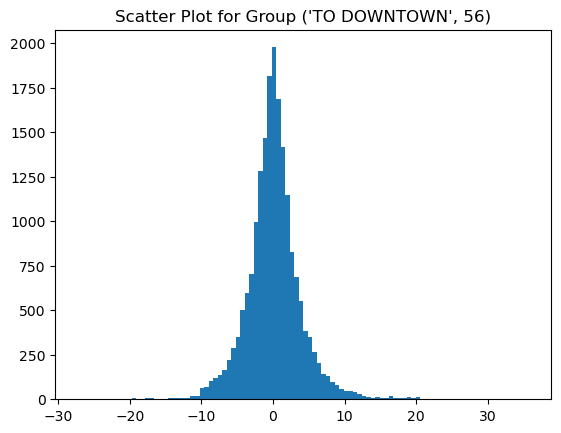

In [16]:
groups = complete_trips.groupby(['ROUTE_DIRECTION_NAME', 'ROUTE_ABBR'])

for group_name, group_data in groups:
    plt.figure()
    plt.hist(group_data['HDWY_DEV'],bins=100)
    plt.title(f'Scatter Plot for Group {group_name}')
    print(group_data['HDWY_DEV'].describe())
    plt.show()


How do I remove outliers from each of these distribution individually?

In [20]:
# Function to remove outliers using z-score within each group
def remove_outliers(group):
    threshold = 2  # Adjust as needed
    z_scores = zscore(group['HDWY_DEV'])
    group_no_outliers = group[abs(z_scores) <= threshold]
    return group_no_outliers

# Apply the function to each group
df_no_outliers = complete_trips.groupby(['ROUTE_DIRECTION_NAME','ROUTE_ABBR']).apply(remove_outliers)

# Reset the index after groupby and apply
df_no_outliers = df_no_outliers.reset_index(drop=True)

# Display the resulting DataFrame without outliers
print(df_no_outliers)

Empty DataFrame
Columns: [Unnamed: 0, CALENDAR_ID, SERVICE_ABBR, ADHERENCE_ID, DATE, ROUTE_ABBR, BLOCK_ABBR, OPERATOR, TRIP_ID, OVERLOAD_ID, ROUTE_DIRECTION_NAME, TIME_POINT_ABBR, ROUTE_STOP_SEQUENCE, TRIP_EDGE, LATITUDE, LONGITUDE, SCHEDULED_TIME, ACTUAL_ARRIVAL_TIME, ACTUAL_DEPARTURE_TIME, ADHERENCE, SCHEDULED_HDWY, ACTUAL_HDWY, HDWY_DEV, ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, ADJUSTED_ONTIME_COUNT, STOP_CANCELLED, PREV_SCHED_STOP_CANCELLED, IS_RELIEF, BLOCK_STOP_ORDER, DWELL_IN_MINS, trip_date]
Index: []

[0 rows x 32 columns]


/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

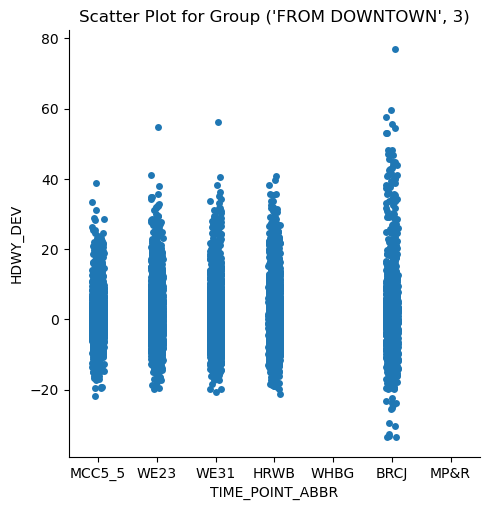

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

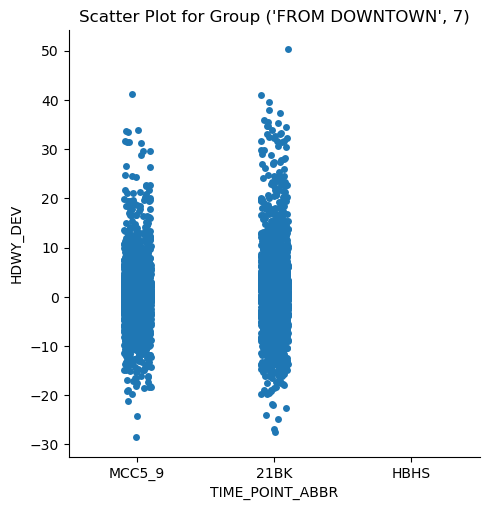

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

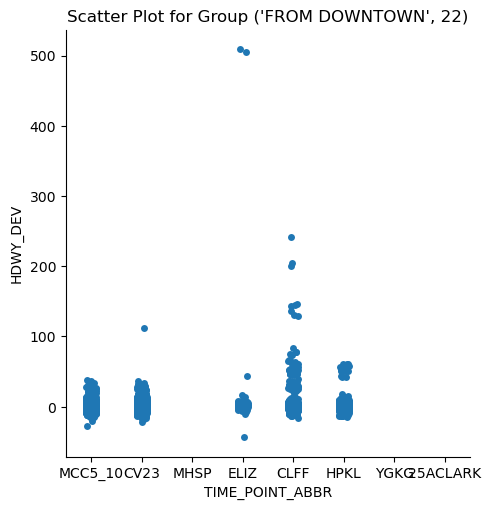

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

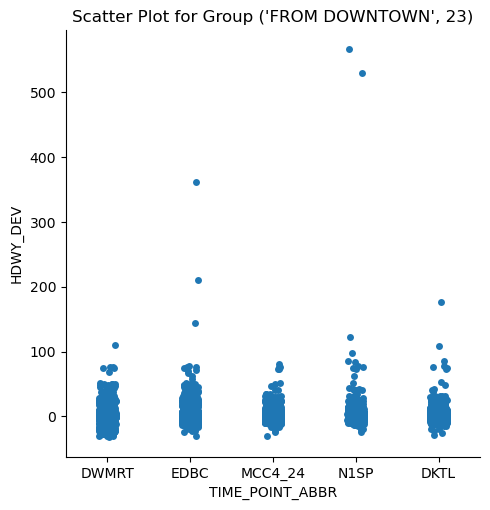

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

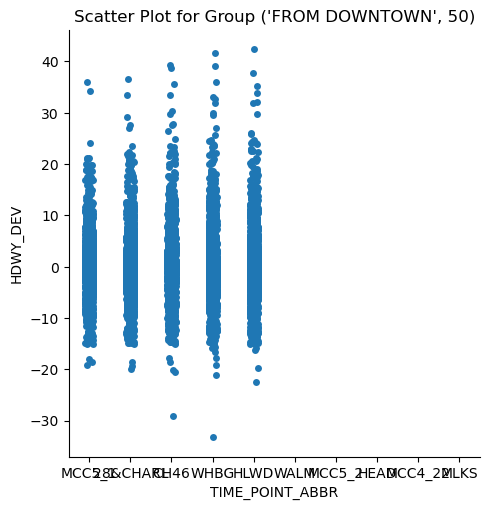

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

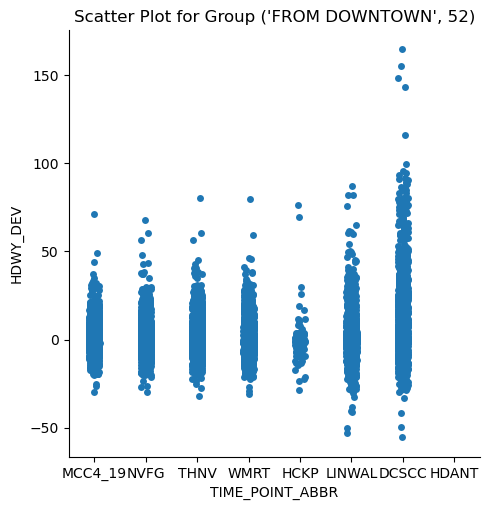

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

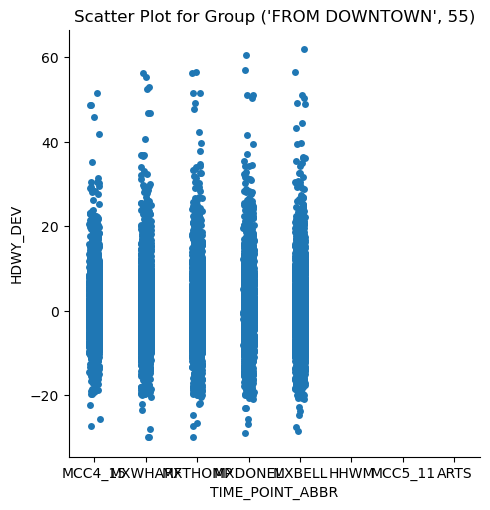

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

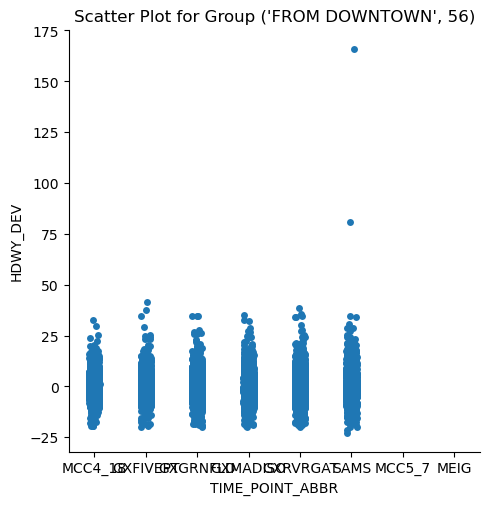

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

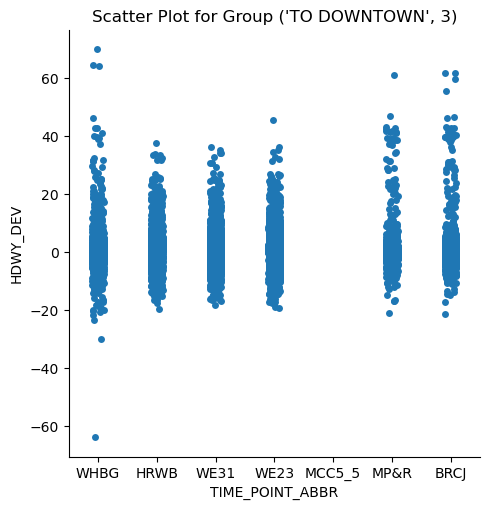

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

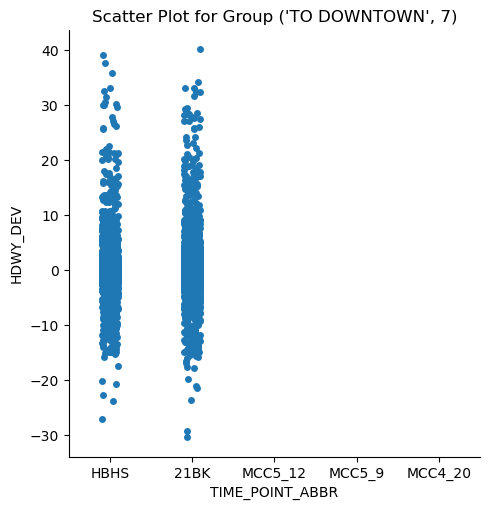

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

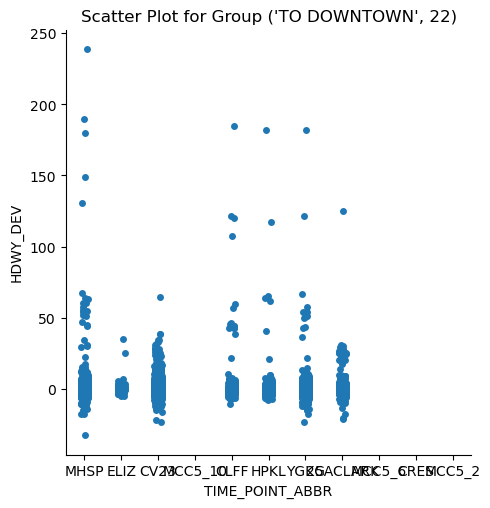

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

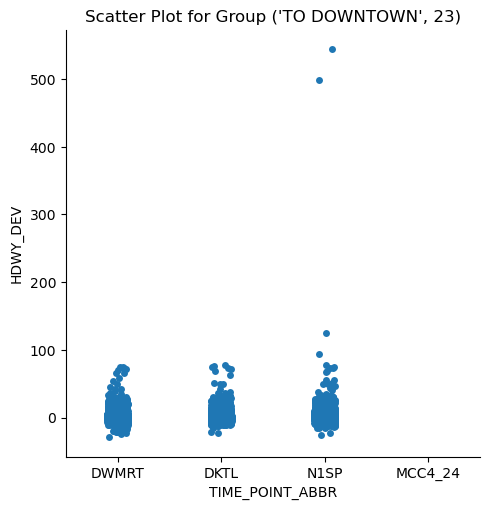

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

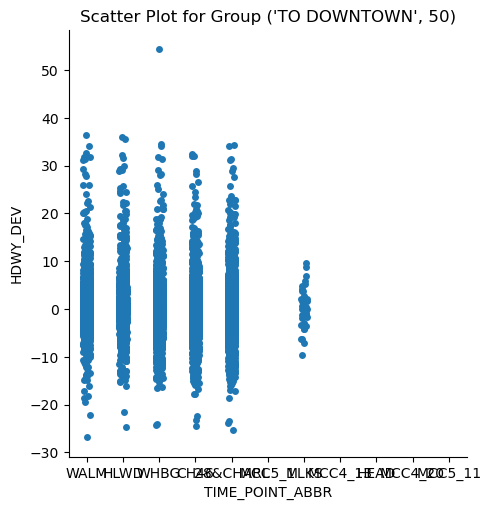

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

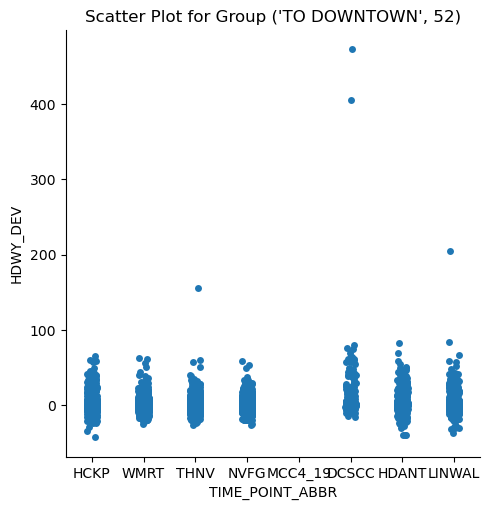

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

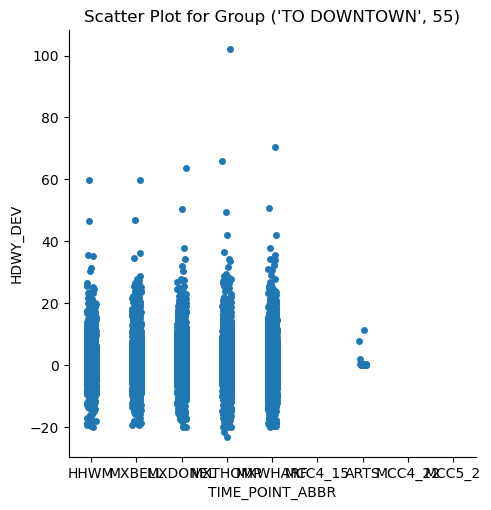

/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prahlad/anaconda3/envs/geospatial_ds/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 640x480 with 0 Axes>

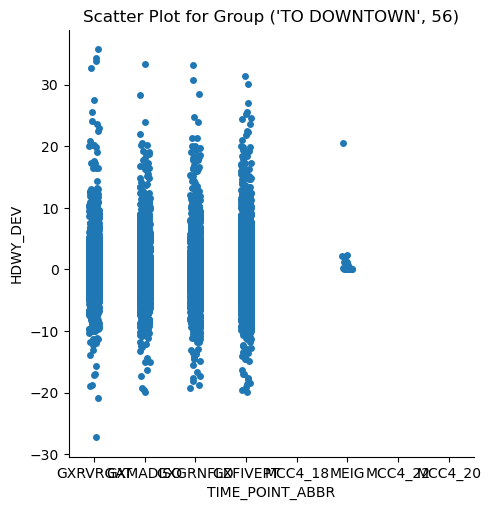

In [8]:
# Group by 'Group1' and 'Group2' and plot scatter plots for 'Column1' and 'Column2'
groups = complete_trips.groupby(['ROUTE_DIRECTION_NAME', 'ROUTE_ABBR'])

for group_name, group_data in groups:
    plt.figure()
    sns.catplot(x='TIME_POINT_ABBR', y='HDWY_DEV', data=group_data)
    plt.title(f'Scatter Plot for Group {group_name}')
    plt.show()
